In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
import os

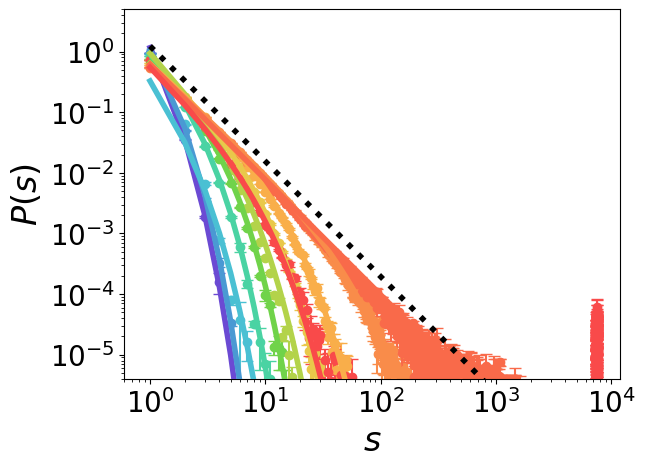

In [6]:
base_dir = "./" 
os.chdir(base_dir)

gzz_files = sorted(glob.glob("clustersize_LD_5_WCA_*.csv"))
fit_params = pd.read_csv("cluster_fit_LD_5_WCA.csv")
gel_rat = 0.4

r_values = [float(name.split("_")[-1].replace(".csv","")) for name in gzz_files]

colors_hex = [
    '#6b4ad3', '#4a99d3', '#4ac0d3', '#4ad3a3', '#70d34a',
    '#b3d34a', '#e9c84a', '#f9ae4a', '#f98c4a', '#f96a4a', '#f94a4a'
]

def fit_func(x, ac, bc, lc):
    return ac*x**(-bc)*np.exp(-x/lc)

plt.ylim(4*10**-6, 5e-0)
plt.xlim(0.6, 1.2e4)
plt.xscale('log')
plt.yscale('log')
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)
plt.xlabel('$s$', fontsize=24)
plt.ylabel('$P(s)$', fontsize = 24)


for i, (r_value, color) in enumerate(zip(r_values, colors_hex)):
    file = f"clustersize_LD_5_WCA_{r_value}.csv"
    data = pd.read_csv(file)

    x = np.array(data["cluster_size"])
    y = np.array(data[" probability"])
    yerr = data[" probability_err"]

    params = fit_params.iloc[i]
    ac = params["ac"]
    bc = params["bc"]
    lc = params["lc"]

    plt.errorbar(x, y, yerr=yerr, fmt='o', color=colors_hex[i], capsize=4)
    x_plot = np.linspace(1, 500, 500)
    y_plot = fit_func(x_plot, ac, bc, lc)
    plt.plot(x_plot, y_plot, color=colors_hex[i], lw=4, zorder=10*(i+1))
    if r_value==gel_rat:
        x_plot = np.linspace(1, x.max(), 500)
        y_plot = fit_func(x_plot, ac, bc, lc)
        plt.plot(x_plot, y_plot*2, color = "black", lw = 4, linestyle=":", zorder=10000)
plt.show()

